# Computational Essay FYS2130

Hva må variere med lag? 
- sigma (blir større og større)
- theta (innfallsvinkel)
- A 
- K (dette skjer "naturli")
- Høyden på kappen og høyden på bunnen av laget

In [3]:
import numpy as np 
import matplotlib.pyplot as plt 

In [94]:
class Person:
    def __init__(self, hoyde, posisjon):
        self.h, self.p = hoyde, posisjon
     
    
class Kappe:
    def __init__(self, usynlig, observatør, bredde_venstre,bredde_høyre, alpha, N_lag, AN=None, n_steg = 1000):
        self.u, self.o, self.b_h, self.b_v, self.alpha, self.N, self.AN = usynlig, observatør, bredde_høyre, bredde_venstre, alpha, N_lag, AN
        
        self.x = np.linspace(-self.b_v, self.b_h, n_steg)
        self.y = np.zeros((self.N,n_steg))
        self.yder = np.zeros((self.N,n_steg))
        self.n = np.zeros((self.N,n_steg))
        self.AN = AN or self.u.h*1.001
    
    
    def lag_gauss(self, sigma1, sigmaN):
        self.sigma1 = sigma1
        dsigma = (sigmaN-sigma1)/(self.N-1)
        
        AN = self.AN
        N = self.N
        x = self.x
        
        A1 = self.u.h
        dH = A1/(N-1)
        dA = (AN - A1)/(N-1)
        
        for i in range(N):
            Ai = A1 - i*dH + i*dA     #Fjerner det vi løfter
        
            self.y[i,:] = Ai * np.exp(-x**2 / (2*(sigma1+ i*dsigma)**2)) + i*dH
            self.yder[i,:] = np.gradient(self.y[i,:], self.x[1]- self.x[0])
    
        
    def brytningsindeks(self, tol = 0.01):
        n = self.n
        for i in range(self.N):
            theta = np.arctan2((self.o.h - self.y[i,0]) , (self.o.p - self.b_v)) #se tegning
            #print(theta*180/np.pi)
            phi = np.arctan(self.yder[i,0])
            theta_a = self.alpha - phi
            theta_b = self.alpha + theta
            
            print(theta_b/theta_a, theta)
            K = np.sin(phi) * np.sin(theta_b) / np.sin(theta_a)
           
            assert theta_b > theta_a, 'Umulig n'
            assert theta_b < np.pi/2, 'Går tilbake over grensesjikt'  
            
            n[i,:] = K * np.sqrt(1 + self.yder[i,:]**2) / self.yder[i,:]
            n[i, np.abs(self.yder[i,:]) < tol] = float('nan')
        
        
        return self.x, n
    
    
    def sjekk_n(self):
        if np.min(np.abs(self.n[np.isnan(n)==False])) < 1:
            print('Umulig n')
        else:
            print('Mulig n. Kjempebra jobba!')
        
        
    def plot_kappe(self, syn = False):
        x = self.x
        if syn==False:
            for j in range(self.N):
                plt.plot(x,self.y[j,:])
        else: 
            for j in range(self.N):
                plt.plot(x,self.y[j,:])
                plt.plot([-self.o.p, -self.b_v], [self.o.h, self.y[j,0]])
        plt.grid()
        plt.xlabel('x [m]')
        plt.ylabel('y [m]')
        
        
    def plot_n(self, ylim=5): 
        x = self.x
        
        for j in range(self.N):
            plt.plot(x,self.n[j,:])
        plt.grid()
        plt.title(f'n(x) når alpha = {alpha*180/np.pi:.2f} grader')
        plt.show()     
        for j in range(self.N):
            plt.plot(x,self.n[j,:])
        plt.axis([-self.b_v, self.b_h, -ylim, ylim])
        plt.grid()
        plt.title(f'n(x) når alpha = {alpha*180/np.pi:.2f} grader')
        plt.xlabel('x [m]')
        plt.ylabel('n')
        

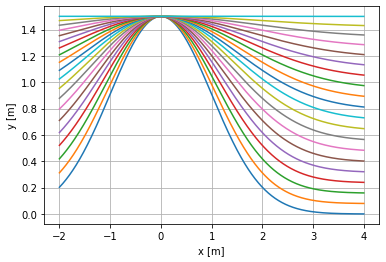

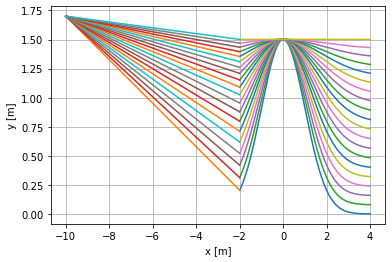

In [100]:
harry = Person(1.5, 0)
V = Person(1.7, 10)

kappe1 = Kappe(harry, V, 2, 4, np.pi/6, 20)
kappe1.lag_gauss(1,2)
kappe1.plot_kappe()
plt.show()

kappe1.plot_kappe(syn=True)

5.196629272791747 0.18498530801431842
5.655071002363989 0.17170647664291705
5.763484297772614 0.15877712217035328
5.513881424174474 0.14631157347779514
5.019990860697578 0.13439211361873127
4.428143163531302 0.12307292861050444
3.8454567169097884 0.11238478461915877
3.325501243673302 0.1023397032082989
2.8843796448557706 0.09293523628167469
2.519203867308578 0.08415816123896497
2.2198962924883507 0.0759875506275763
1.9750192083261944 0.06839724545010607
1.774133058035045 0.06135779798221598
1.6084924906875107 0.05483796335167689
1.4710523194497211 0.048805819266997404
1.3562366855099306 0.04322958659614398
1.2596619981968162 0.038078213902747196
1.1778841445496049 0.033321778804638276
1.1081895938846487 0.028931749326561174
1.0484303409502218 0.02488113983120055


<ipython-input-94-8fef98337868>:51: RuntimeWarning: divide by zero encountered in true_divide
  n[i,:] = K * np.sqrt(1 + self.yder[i,:]**2) / self.yder[i,:]


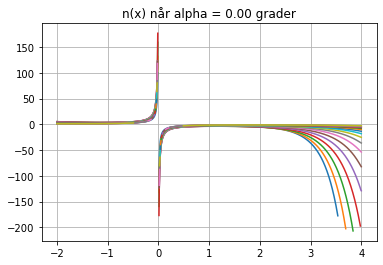

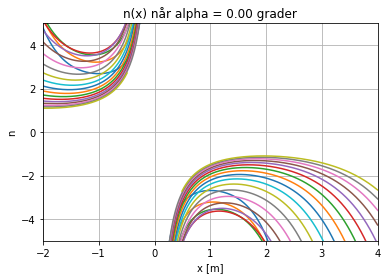

Mulig n. Kjempebra jobba!


In [101]:
x, n = kappe1.brytningsindeks(0.01)
kappe1.plot_n()
plt.show()
kappe1.sjekk_n()

Mulige forandringer 
- avstand --> endrer på theta 
- alpha 
    Kan vi finne et passende forhold mellom disse?
    
- sigma 
- lengde av kappe (endrer avstand)


alpha 0.5235987755982988
5.196629272791747 0.18498530801431842
5.655071002363989 0.17170647664291705
5.763484297772614 0.15877712217035328
5.513881424174474 0.14631157347779514
5.019990860697578 0.13439211361873127
4.428143163531302 0.12307292861050444
3.8454567169097884 0.11238478461915877
3.325501243673302 0.1023397032082989
2.8843796448557706 0.09293523628167469
2.519203867308578 0.08415816123896497
2.2198962924883507 0.0759875506275763
1.9750192083261944 0.06839724545010607
1.774133058035045 0.06135779798221598
1.6084924906875107 0.05483796335167689
1.4710523194497211 0.048805819266997404
1.3562366855099306 0.04322958659614398
1.2596619981968162 0.038078213902747196
1.1778841445496049 0.033321778804638276
1.1081895938846487 0.028931749326561174
1.0484303409502218 0.02488113983120055


<ipython-input-94-8fef98337868>:51: RuntimeWarning: divide by zero encountered in true_divide
  n[i,:] = K * np.sqrt(1 + self.yder[i,:]**2) / self.yder[i,:]


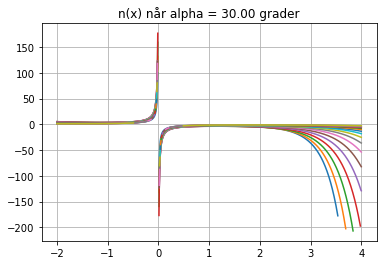

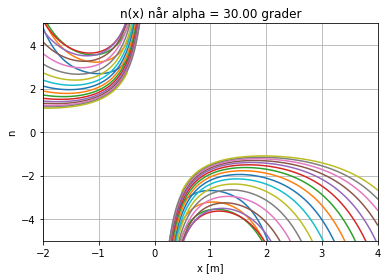

<ipython-input-94-8fef98337868>:51: RuntimeWarning: divide by zero encountered in true_divide
  n[i,:] = K * np.sqrt(1 + self.yder[i,:]**2) / self.yder[i,:]


Mulig n. Kjempebra jobba!
alpha 0.7853981633974483
2.4372067224535843 0.18498530801431842
2.487589043963741 0.17170647664291705
2.4833921637958114 0.15877712217035328
2.430792576699781 0.14631157347779514
2.3411868108815774 0.13439211361873127
2.22753938056449 0.12307292861050444
2.101625193835355 0.11238478461915877
1.9726491700167244 0.1023397032082989
1.846989588795813 0.09293523628167469
1.7285718445213798 0.08415816123896497
1.6194628601837788 0.0759875506275763
1.5204499097818194 0.06839724545010607
1.4315075959415497 0.06135779798221598
1.352136715924196 0.05483796335167689
1.2815931261793616 0.048805819266997404
1.2190337156597695 0.04322958659614398
1.1636045006103644 0.038078213902747196
1.1144903414839962 0.033321778804638276
1.0709402215612005 0.028931749326561174
1.032277538387406 0.02488113983120055


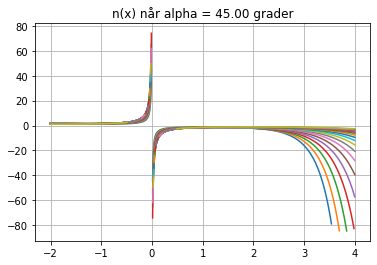

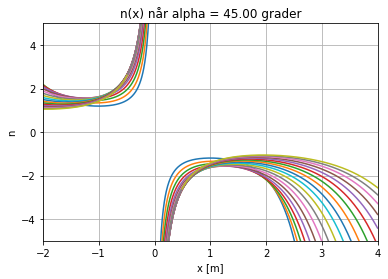

Mulig n. Kjempebra jobba!
alpha 0.2617993877991494
-3.561603087259595 0.18498530801431842
-3.12218693375036 0.17170647664291705
-2.932829853038003 0.15877712217035328
-2.908759069451228 0.14631157347779514
-3.030718628093575 0.13439211361873127
-3.3246682594269794 0.12307292861050444
-3.8810275835025503 0.11238478461915877
-4.94918353562675 0.1023397032082989
-7.38259466200456 0.09293523628167469
-16.83509481826057 0.08415816123896497
40.71114903029503 0.0759875506275763
8.702549346119177 0.06839724545010607
4.758283924445778 0.06135779798221598
3.237110480834853 0.05483796335167689
2.439698610922165 0.048805819266997404
1.9535272361210574 0.04322958659614398
1.6289231148780974 0.038078213902747196
1.3985791813784385 0.033321778804638276
1.227806479635812 0.028931749326561174
1.0969449798211268 0.02488113983120055


<ipython-input-94-8fef98337868>:51: RuntimeWarning: divide by zero encountered in true_divide
  n[i,:] = K * np.sqrt(1 + self.yder[i,:]**2) / self.yder[i,:]


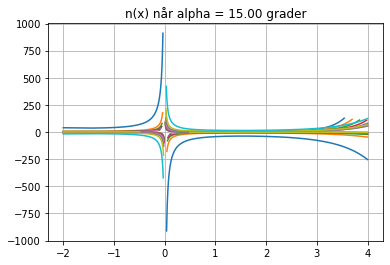

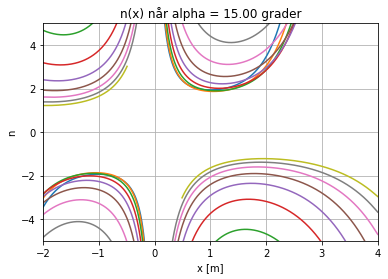

Mulig n. Kjempebra jobba!
alpha 0
-0.47769675890004853 0.18498530801431842
-0.42857377521897055 0.17170647664291705
-0.3918464917823364 0.15877712217035328
-0.36386542436049646 0.14631157347779514
-0.3423787831553592 0.13439211361873127
-0.3259674577347615 0.12307292861050444
-0.313737250344337 0.11238478461915877
-0.3051500870793271 0.1023397032082989
-0.2999366831814827 0.09293523628167469
-0.29806413432905954 0.08415816123896497
-0.299751017744198 0.0759875506275763
-0.3055400776513941 0.06839724545010607
-0.3164653318035979 0.06135779798221598
-0.33440927527754105 0.05483796335167689
-0.3629051156440822 0.048805819266997404
-0.40915136123873935 0.04322958659614398
-0.4900433049063247 0.038078213902747196
-0.65614199891801 0.033321778804638276
-1.1567918982021113 0.028931749326561174
-54.69625428559962 0.02488113983120055


<ipython-input-94-8fef98337868>:51: RuntimeWarning: divide by zero encountered in true_divide
  n[i,:] = K * np.sqrt(1 + self.yder[i,:]**2) / self.yder[i,:]


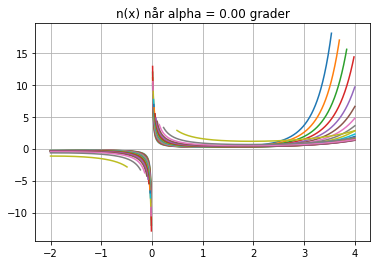

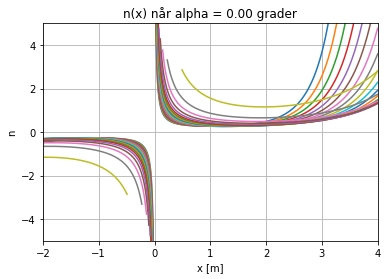

Umulig n


In [97]:
for alpha in [np.pi/6, np.pi/4, np.pi/12, 0]:
    print('alpha', alpha)
    kappe1 = Kappe(harry, V, 2, 4, alpha, 20)
    kappe1.lag_gauss(1,2)
    #kappe1.plot_kappe()
    #plt.show()
    x, n = kappe1.brytningsindeks(0.01)
    kappe1.plot_n()
    plt.show()
    kappe1.sjekk_n()

In [78]:
class Kappe: 
    def __init__(self, x, A):
        self.x, self.A = x, A
        
    def gauss(self, sigma):
        self.sigma = sigma
        x, A = self.x, self.A
        
        y = A * np.exp(-x**2 / (2*sigma**2))
        yder = -x/sigma**2 * y
        
        self.y, self.yder = y, yder
        return y, yder
        
        
    def harmonisk(self, skalering):
        self.skalering = skalering
        x, A = self.x, self.A
        
        y = np.cos(x * skalering) * A/2 + A/2
        yder = np.gradient(y, x[1]-x[0])
        
        self.y, self.yder = y, yder
        return y, yder
    
    
    def brytningsindeks(self, theta):
        self.theta = theta
        
        K = np.sin(theta) 
        n = K * np.sqrt(1 + self.yder**2) / self.yder
        n[np.abs(self.yder) < 0.001] = float('nan')
        
        self.K, self.n = K, n
        return n
        
    
    def plot_kappe(self):
        plt.plot(self.x,self.y)
        plt.plot(self.x, self.yder, '--')
        plt.show()
      
    
    def plot_n(self):
        plt.plot(self.x,self.n)
        plt.show()
       
    
    def add_gaussian_layers(self, AN, sigmaN, thetaN, N): 
        # Kan ta inn metode og så lage if method=='gauss'/if method=='harmonisk'
        y = np.zeros([N,len(self.x)])
        yder = np.zeros([N,len(self.x)])
        n = np.zeros([N,len(self.x)])
        
        A1 = self.A
        dA = (AN - A1)/(N-1)
        
        sigma1 = self.sigma
        dsigma = (sigmaN - sigma1)/(N-1)
        
        theta0 = self.theta
        dtheta = (thetaN - theta0)/(N-1) 
        
        for i in range(N):
            self.A = A1 + i*dA
            sigma = sigma1 + i*dsigma
            theta = theta0 + i*dtheta
            y[i,:], yder[i,:] = self.gauss(sigma)
            n[i,:] = self.brytningsindeks(theta)
        
        return y, yder, n        

In [6]:
# kappe/usynlig person:
h1 = 1.5 # [m] høyde under kappe
sigma1 = 1 # [m] std. innerste kappe
x1 = 4 # [m] 1/2 bredde på innerste kappe

# (ikke-)observant:
H = 1.7 # [m] høyde på Voldemort
L = 10 # [m] avstand fra Harry
L_ = L - x1 # avstand fra kappe


skalering = np.pi/(x1*4/5)
theta0 = np.arctan(H/L)
thetaN = np.arctan((H - h1)/(L_))
sigmaN = 2
AN = h1 + 0.1
N = 10

x = np.linspace(-x1, x1, 1000)

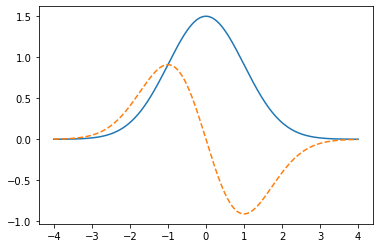

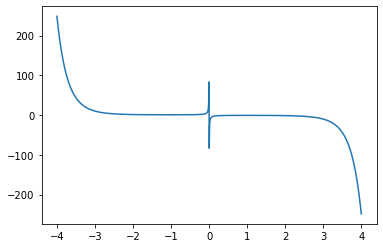

In [7]:
kappe1 = Kappe(x, h1)
y, yder = kappe1.gauss(sigma1)
n = kappe1.brytningsindeks(np.pi/6)

kappe1.plot_kappe()
kappe1.plot_n()

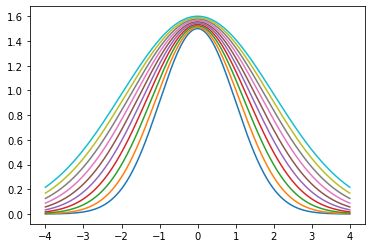

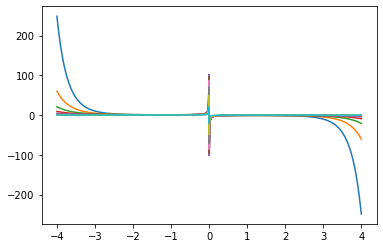

In [8]:
y, yder, n = kappe1.add_gaussian_layers(AN, sigmaN, thetaN, N)

for i in range(N):
    plt.plot(x, y[i,:])
plt.show()

for i in range(N):
    plt.plot(x, n[i,:])
plt.show()

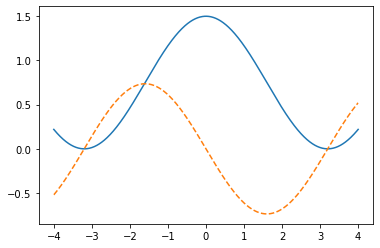

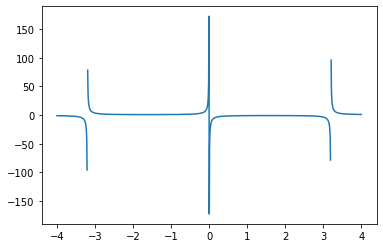

In [9]:
kappe2 = Kappe(x, h1)
y,yder = kappe2.harmonisk(skalering)
n = kappe2.brytningsindeks(np.pi/6)

kappe2.plot_kappe()
kappe2.plot_n()

In [10]:
import numpy as np 
import matplotlib.pyplot as plt 

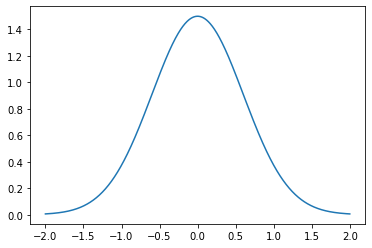

In [11]:
h_H = 1.5 # Høyde Harry 
h_V = 1.7 # Høyde Voldemort 
N = 20 # antall lag i kappen 
L = 8 # m, avstand fra Voldemort til Harrys kappe, langs bakken
l0 = 2 #m, avstand fra starten av kappen inn til Harry

sigma = 0.6 # Denne avhenger av hvilket lag i kappen vi ser på  (burde avhenge av hvor mange lag vi har)


y = lambda x, A, sigma: A * np.exp(- x**2 / (2*sigma**2)) 
y_ = lambda x, A, sigma: -x/(sigma)**2 * y(x, A, sigma)

x = np.linspace(-2,2, 1000)

plt.plot(x, y(x,h_H,sigma))
#print(np.max(y(x,h_H,sigma)))

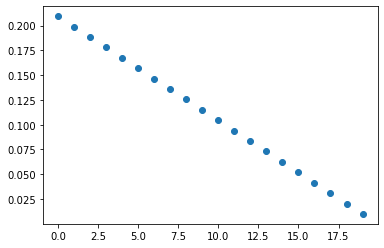

In [12]:
# Lager array med ulike innfallsvinkler:
# Denne baserer seg på en lineær endring i angrepspunkt, Hva med en gaussisk endring?
theta0 = np.arctan(h_V/L)
thetaN = np.arctan((h_V - h_H)/(L + l0))
dtheta = (thetaN - theta0)/(N-1)
theta = np.linspace(theta0, thetaN + dtheta, N)  

plt.scatter(range(N),theta)
# Ønsker å koble innfallsvinkler mot de andre størrelsene  

In [13]:
# Lager array med ulike bredder på lagene
sigma0 = 0.5 
sigmaN = 1.5 
dsigma = (sigmaN - sigma0) / (N-1)
sigma = np.linspace(sigma0, sigmaN + dsigma, N) 

# OBS, høyden minker også når sigma øker 

In [14]:
i = np.linspace(0, N-1, N)

dH = h_H/N
A = h_H - i*dh 
 

NameError: name 'dh' is not defined

In [ ]:
for i in range(N):
    y = lambda x: A[i] * np.exp(- x**2 / (2*sigma[i]**2)) + i*dH
    plt.plot(x, y(x), label=f'{i}')
#plt.legend()

In [ ]:
def ref_index(x, theta0): 
    K = np.sin(theta0)
    n = K/y_(x, h_H, sigma) * np.sqrt(1 + y_(x, h_H, sigma)**2)
    
    return n 
    
n = ref_index(x,np.pi/4) 

plt.plot(x, n)
plt.ylim(-10, 10)
plt.grid()

In [ ]:
%reset -f 
import numpy as np 
import matplotlib.pyplot as plt 

#Vil lage et program hvor innfalsvinklene (theta) avgjør hvordan kappen ser ut. Hvilke parabler må avgjøres?
    # sigma 
    # konstantleddet 
    
theta = 

h_H = 1.5 # Høyde Harry 
h_V = 1.7 # Høyde Voldemort 
N = 20 # antall lag i kappen 
L0 = 8 # m, avstand fra Voldemort til Harrys kappe, langs bakken

theta0 = np.arctan(h_V/L0)

y = lambda x, A, sigma: A * np.exp(- x**2 / (2*sigma**2)) 
y_ = lambda x, A, sigma: -x/(sigma)**2 * y(x, A, sigma)

x0 =  #der hvor lysstrålen treffer kappen 
phi0 = np.arctan(y_(x0))

In [ ]:
# Endring i L vil skje med endring i kappen 
L = np.tan(theta)